# Comments

# *Inception Exploration have less exlaination.*
# *In some plots x and y have same titles*
# *Corr Matrix*

# Book Recommendation Dataset - Group E Project

---

## **1. Inception Steps**





### Loading Libraries


Necessary libraries have to be imported for our data analysis. Pandas library is used for reading our dataset, and seaborn and matplotlib libraries are used for visualization.

In [ ]:
# Importing the required libraries for the analysis and visualization

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Dataset

In [ ]:
# Uploading Kaggle credentials using the files class of google.colab

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saharraihani","key":"6094864ce557b61580a3d451101437c7"}'}

In [ ]:
# Installing Kaggle python package using pip
!pip install kaggle

# Making a directory named ".kaggle" in the user's home directory
!mkdir ~/.kaggle

# Copying  a file named "kaggle.json" to the newly created ".kaggle" directory
!cp kaggle.json ~/.kaggle/

# Adjusting the permissions of the "kaggle.json" file, ensuring that only the owner has read and write acces
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading the dataset

!kaggle datasets download -d imtkaggleteam/book-recommendation-good-book-api

Dataset URL: https://www.kaggle.com/datasets/imtkaggleteam/book-recommendation-good-book-api
License(s): other
100% 622k/622k [00:00<00:00, 1.09MB/s]
100% 622k/622k [00:00<00:00, 1.08MB/s]


In [ ]:
# Unzipping the downloaded dataset and listing the contents

!unzip book-recommendation-good-book-api.zip
!ls

Archive:  book-recommendation-good-book-api.zip
  inflating: books.csv               
book-recommendation-good-book-api.zip  books.csv  kaggle.json  sample_data


### Reading Dataset Into a Pandas Dataframe

In [ ]:
# Reading the books.csv file into a dataframe called books
books = pd.read_csv("/content/books.csv", on_bad_lines = 'skip')

# Inspecting books first rows
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


---

## **2. Initial Exploration**

### Checking the Dataset's Shape

To know our dataframe's dimension, we use the `shape` attribute which will return a tuple containing the number of rows and columns of the dataframe.

In [ ]:
# Checking the books dataframe's shape (number of rows and columns)

print("Shape of the books dataframe:")
print(books.shape)
print("This dataframe has {} rows and {} columns.".format(books.shape[0], books.shape[1]))

Shape of the books dataframe:
(11123, 12)
This dataframe has 11123 rows and 12 columns.


### Checking the Dataset Columns' Data Types

**First:** Counting the number of numerical and categorical columns of `books`




In [ ]:
# Counting numerical columns
numerical_columns = books.select_dtypes(include=['int64', 'float64']).columns
num_numerical_columns = len(numerical_columns)

# Counting categorical columns
categorical_columns = books.select_dtypes(include=['object', 'category']).columns
num_categorical_columns = len(categorical_columns)

# Printing the counts
print("Number of numerical columns:", num_numerical_columns)
print("List of numerical columns:")
for column in numerical_columns:
  print(column)
print(" ")
print("Number of categorical columns:", num_categorical_columns)
print("List of categorical columns:")
for column in categorical_columns:
  print(column)

Number of numerical columns: 6
List of numerical columns:
bookID
average_rating
isbn13
  num_pages
ratings_count
text_reviews_count
 
Number of categorical columns: 6
List of categorical columns:
title
authors
isbn
language_code
publication_date
publisher


**Second:** Using `info()` method to get a summary of `books` dataframe and its columns' data types

In [ ]:
# Using info() to get a concise summary of the DataFrame

print("DataFrame information:")
books.info()

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


The `num_pages` column name seems to have extra spaces, so we rename it for error-free accessing.

In [ ]:
# Renaming the column names

books = books.rename(columns = {'  num_pages': 'num_pages'})
books.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

### Checking Null Values


In [ ]:
# Count of null values in each column
null_counts = books.isnull().sum()
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64


### Checking Duplicate Values

For checking duplicated rows in our dataframe, `duplicated()` method is called on the dataframe and aggregated with `sum()` method to get the number of duplicated records.

In [ ]:
# Checking for duplicate values
duplicate_rows = books.duplicated().sum()

# Printing the count of duplicate rows
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


### Summary Statistics of Numerical & Categorical Columns

Using the `describe()` method on `books` dataframe will provide the summary statistics for numerical columns.

In [ ]:
# Checking summary statistics of numeric columns in the DataFrame
numeric_summary_statistics = books.describe()
print("Summary statistics of numericals columns:")
numeric_summary_statistics

Summary statistics of numericals columns:


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


Assigning the `include` attribute of `describe()` method to `"object"` will provide the summary statistics for categorical columns of our dataframe.

In [ ]:
# Checking summary statistics of categorical columns in the DataFrame
categorical_summary = books.describe(include='object')
print("Summary statistics of categorical columns:")
categorical_summary

Summary statistics of categorical columns:


,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


---

## **3. Exploratory Data Analysis**

### **Univariate Analysis**

For analyzing one variable at a time, we apply univariate analysis. Based on the type of our columns we use different plots for analysis, for the numerical columns we use histigroms to better convey the distribution of our data and for the categorical columns we utilize bar plots in our analysis to demostrate the distribution and frequency of recorded values in those columns.

#### **Histograms for Numerical Columns**

Creating histogram for `num_pages` column of our dataframe.

In [ ]:
# Defining a style for our plots
plt.style.use('default')


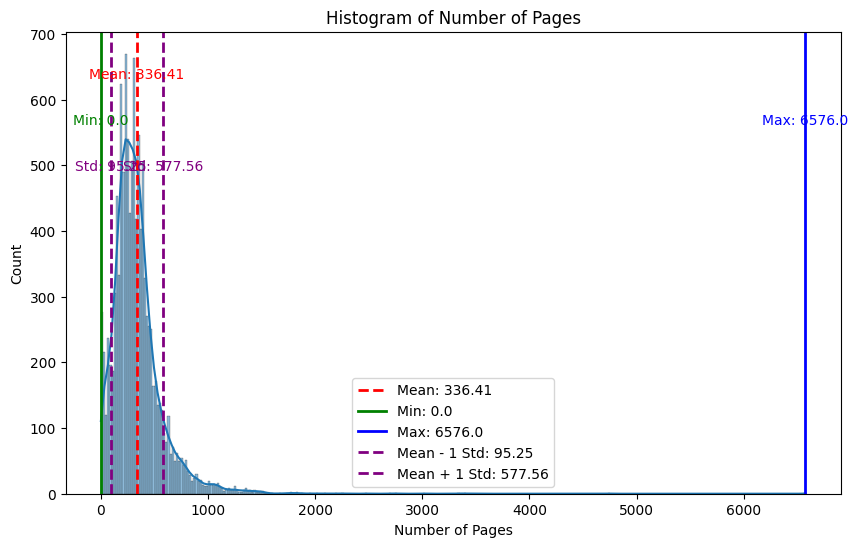

In [ ]:
# Summary statistics for 'num_pages'
summary_stats = books['num_pages'].describe()
mean_age = summary_stats['mean']
std_age = summary_stats['std']
min_age = summary_stats['min']
max_age = summary_stats['max']


# Histogram for 'num_pages'
plt.figure(figsize=(10, 6))
sns.histplot(books['num_pages'], kde=True)

# Adding mean, min, max, and std lines
plt.axvline(mean_age, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(min_age, color='g', linestyle='-', linewidth=2, label=f'Min: {min_age}')
plt.axvline(max_age, color='b', linestyle='-', linewidth=2, label=f'Max: {max_age}')
plt.axvline(mean_age - std_age, color='purple', linestyle='--', linewidth=2, label=f'Mean - 1 Std: {mean_age - std_age:.2f}')
plt.axvline(mean_age + std_age, color='purple', linestyle='--', linewidth=2, label=f'Mean + 1 Std: {mean_age + std_age:.2f}')

# Annotating the lines
plt.text(mean_age, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_age:.2f}', color = 'r', ha='center')
plt.text(min_age, plt.gca().get_ylim()[1]*0.8, f'Min: {min_age}', color = 'g', ha='center')
plt.text(max_age, plt.gca().get_ylim()[1]*0.8, f'Max: {max_age}', color = 'b', ha='center')
plt.text(mean_age - std_age, plt.gca().get_ylim()[1]*0.7, f'Std: {mean_age - std_age:.2f}', color = 'purple', ha='center')
plt.text(mean_age + std_age, plt.gca().get_ylim()[1]*0.7, f'Std: {mean_age + std_age:.2f}', color = 'purple', ha='center')

plt.title('Histogram of Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Count')
plt.legend()
plt.show()


Creating histogram for `average_rating` column of our datafram.

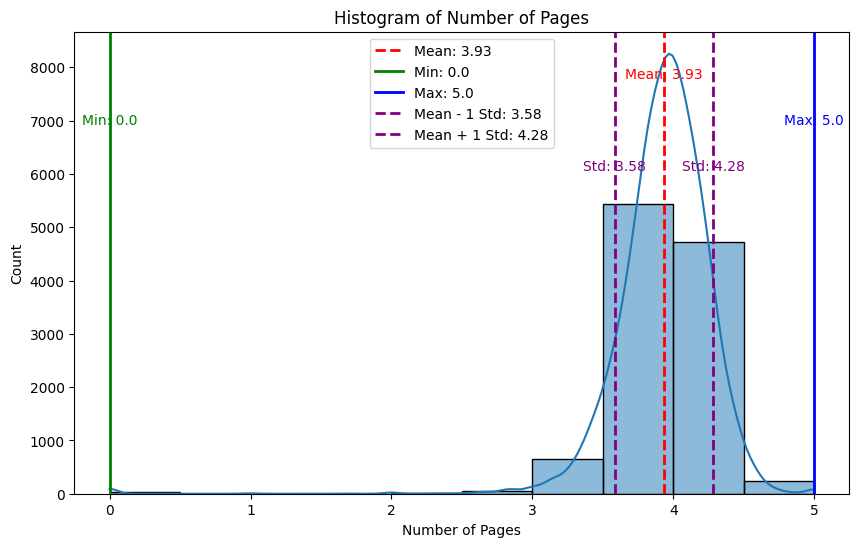

In [ ]:
# Summary statistics for 'average_rating'
summary_stats = books['average_rating'].describe()
mean_age = summary_stats['mean']
std_age = summary_stats['std']
min_age = summary_stats['min']
max_age = summary_stats['max']


# Histogram for 'average_rating'
plt.figure(figsize=(10, 6))
sns.histplot(books['average_rating'], bins=10, kde=True)

# Adding mean, min, max, and std lines
plt.axvline(mean_age, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(min_age, color='g', linestyle='-', linewidth=2, label=f'Min: {min_age}')
plt.axvline(max_age, color='b', linestyle='-', linewidth=2, label=f'Max: {max_age}')
plt.axvline(mean_age - std_age, color='purple', linestyle='--', linewidth=2, label=f'Mean - 1 Std: {mean_age - std_age:.2f}')
plt.axvline(mean_age + std_age, color='purple', linestyle='--', linewidth=2, label=f'Mean + 1 Std: {mean_age + std_age:.2f}')

# Annotating the lines
plt.text(mean_age, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_age:.2f}', color = 'r', ha='center')
plt.text(min_age, plt.gca().get_ylim()[1]*0.8, f'Min: {min_age}', color = 'g', ha='center')
plt.text(max_age, plt.gca().get_ylim()[1]*0.8, f'Max: {max_age}', color = 'b', ha='center')
plt.text(mean_age - std_age, plt.gca().get_ylim()[1]*0.7, f'Std: {mean_age - std_age:.2f}', color = 'purple', ha='center')
plt.text(mean_age + std_age, plt.gca().get_ylim()[1]*0.7, f'Std: {mean_age + std_age:.2f}', color = 'purple', ha='center')

plt.title('Histogram of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.legend()
plt.show()


Creating histogram for `ratings_count` column of our dataframe.

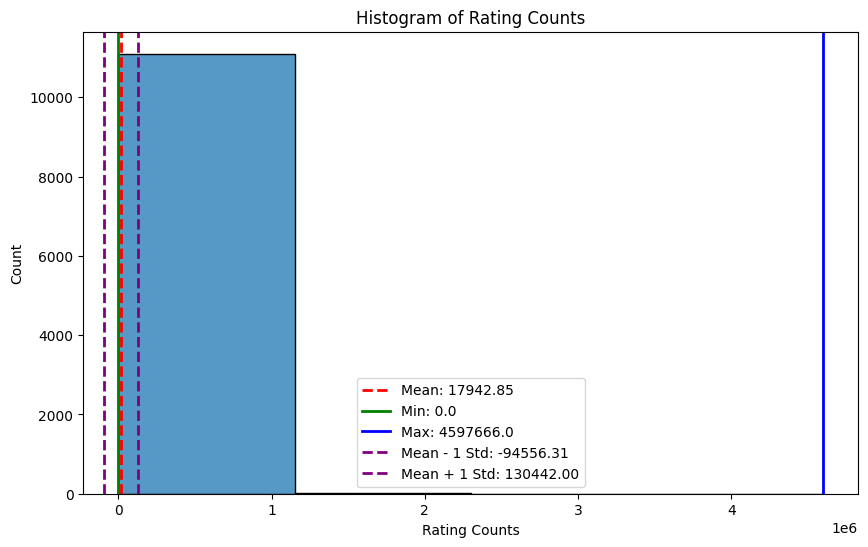

In [ ]:
# Summary statistics for 'ratings_count'
summary_stats = books['ratings_count'].describe()
mean_age = summary_stats['mean']
std_age = summary_stats['std']
min_age = summary_stats['min']
max_age = summary_stats['max']


# Histogram for 'ratings_count'
plt.figure(figsize=(10, 6))
sns.histplot(books['ratings_count'], bins=4)

# Adding mean, min, max, and std lines
plt.axvline(mean_age, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(min_age, color='g', linestyle='-', linewidth=2, label=f'Min: {min_age}')
plt.axvline(max_age, color='b', linestyle='-', linewidth=2, label=f'Max: {max_age}')
plt.axvline(mean_age - std_age, color='purple', linestyle='--', linewidth=2, label=f'Mean - 1 Std: {mean_age - std_age:.2f}')
plt.axvline(mean_age + std_age, color='purple', linestyle='--', linewidth=2, label=f'Mean + 1 Std: {mean_age + std_age:.2f}')


plt.title('Histogram of Rating Counts')
plt.xlabel('Rating Counts')
plt.ylabel('Count')
plt.legend()
plt.show()


Creating histogram for `text_reviews_count` column of our dataframe.

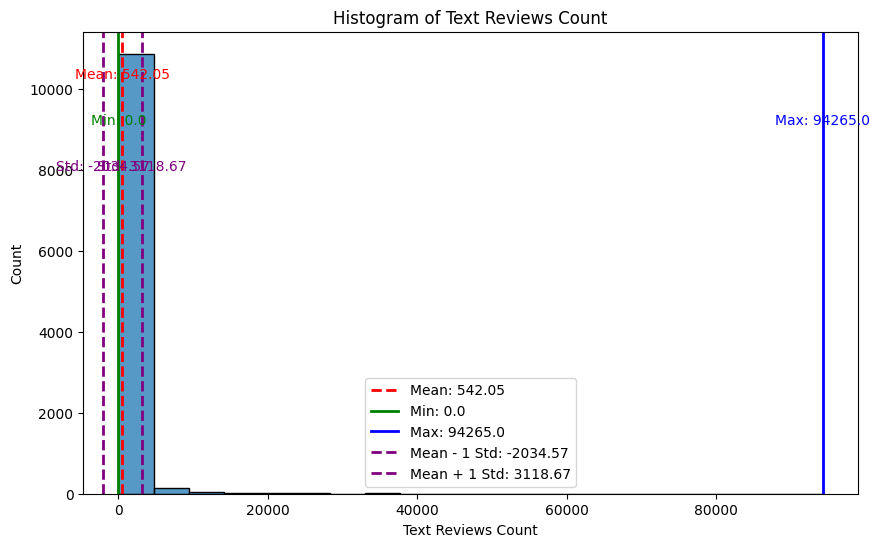

In [ ]:
# Summary statistics for 'text_reviews_count'
summary_stats = books['text_reviews_count'].describe()
mean_age = summary_stats['mean']
std_age = summary_stats['std']
min_age = summary_stats['min']
max_age = summary_stats['max']


# Histogram for 'text_reviews_count'
plt.figure(figsize=(10, 6))
sns.histplot(books['text_reviews_count'], bins = 20)

# Adding mean, min, max, and std lines
plt.axvline(mean_age, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(min_age, color='g', linestyle='-', linewidth=2, label=f'Min: {min_age}')
plt.axvline(max_age, color='b', linestyle='-', linewidth=2, label=f'Max: {max_age}')
plt.axvline(mean_age - std_age, color='purple', linestyle='--', linewidth=2, label=f'Mean - 1 Std: {mean_age - std_age:.2f}')
plt.axvline(mean_age + std_age, color='purple', linestyle='--', linewidth=2, label=f'Mean + 1 Std: {mean_age + std_age:.2f}')

# Annotating the lines
plt.text(mean_age, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_age:.2f}', color = 'r', ha='center')
plt.text(min_age, plt.gca().get_ylim()[1]*0.8, f'Min: {min_age}', color = 'g', ha='center')
plt.text(max_age, plt.gca().get_ylim()[1]*0.8, f'Max: {max_age}', color = 'b', ha='center')
plt.text(mean_age - std_age, plt.gca().get_ylim()[1]*0.7, f'Std: {mean_age - std_age:.2f}', color = 'purple', ha='center')
plt.text(mean_age + std_age, plt.gca().get_ylim()[1]*0.7, f'Std: {mean_age + std_age:.2f}', color = 'purple', ha='center')

plt.title('Histogram of Text Reviews Count')
plt.xlabel('Text Reviews Count')
plt.ylabel('Count')
plt.legend()
plt.show()


#### **Box Plots for Numerical Columns**

Creating box plot for `num_pages` column of our dataframe.

<Axes: xlabel='num_pages'>

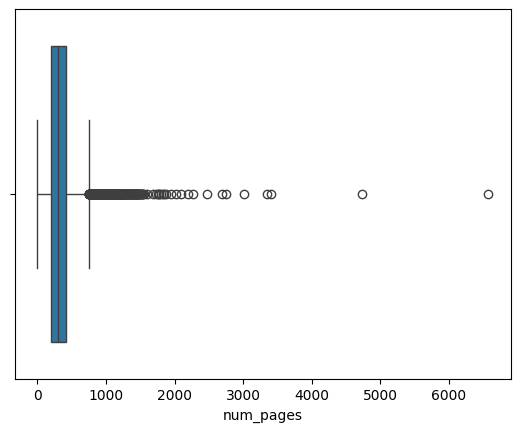

In [ ]:
sns.boxplot(x='num_pages', data=books)

Creating box plot for `average_rating` column of our dataframe.

<Axes: xlabel='average_rating'>

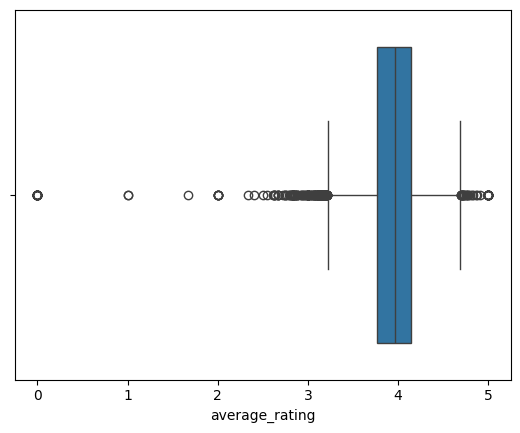

In [ ]:
sns.boxplot(x='average_rating', data=books)

Creating box plot for `ratings_count` column of our dataframe.

<Axes: xlabel='ratings_count'>

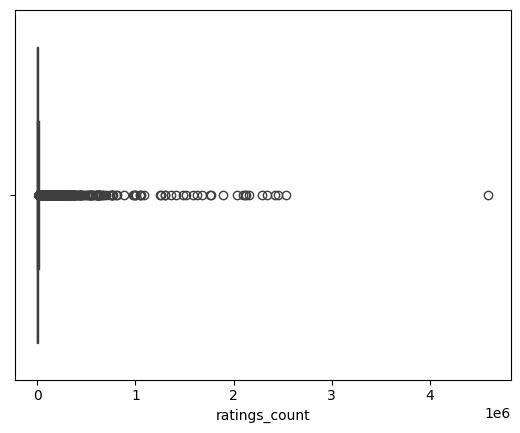

In [ ]:
sns.boxplot(x='ratings_count', data=books)

Creating box plot for `text_reviews_count` column of our dataframe.

<Axes: xlabel='text_reviews_count'>

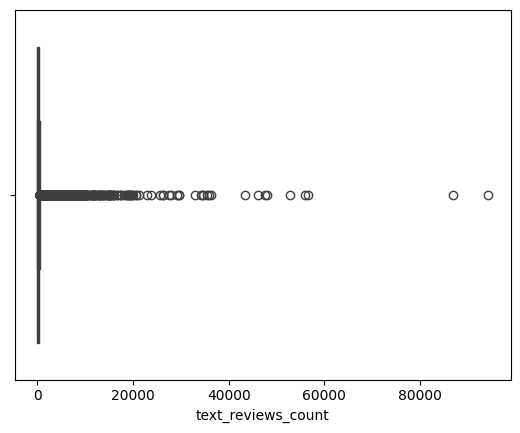

In [ ]:
sns.boxplot(x='text_reviews_count', data=books)

# *When categrical Values are  too many , try to shows top 10*

#### **Bar charts for Categorical columns**

The `title` column's data is the books' titles and almost all of the titles are unique except some of them. The code snipet below finds a series of book titles that appear more than once in our dataframe.

In [ ]:
# Finding titles that appear more than once in the dataset

title_counts = books['title'].value_counts()
duplicate_titles = title_counts[title_counts > 1]
duplicate_titles

title
The Iliad                                                  9
The Brothers Karamazov                                     9
The Odyssey                                                8
Anna Karenina                                              8
'Salem's Lot                                               8
                                                          ..
The Valkyries                                              2
The Complete Works                                         2
Echo Park (Harry Bosch  #12; Harry Bosch Universe  #16)    2
The Richest Man in Babylon                                 2
The Best American Mystery Stories 2004                     2
Name: count, Length: 487, dtype: int64

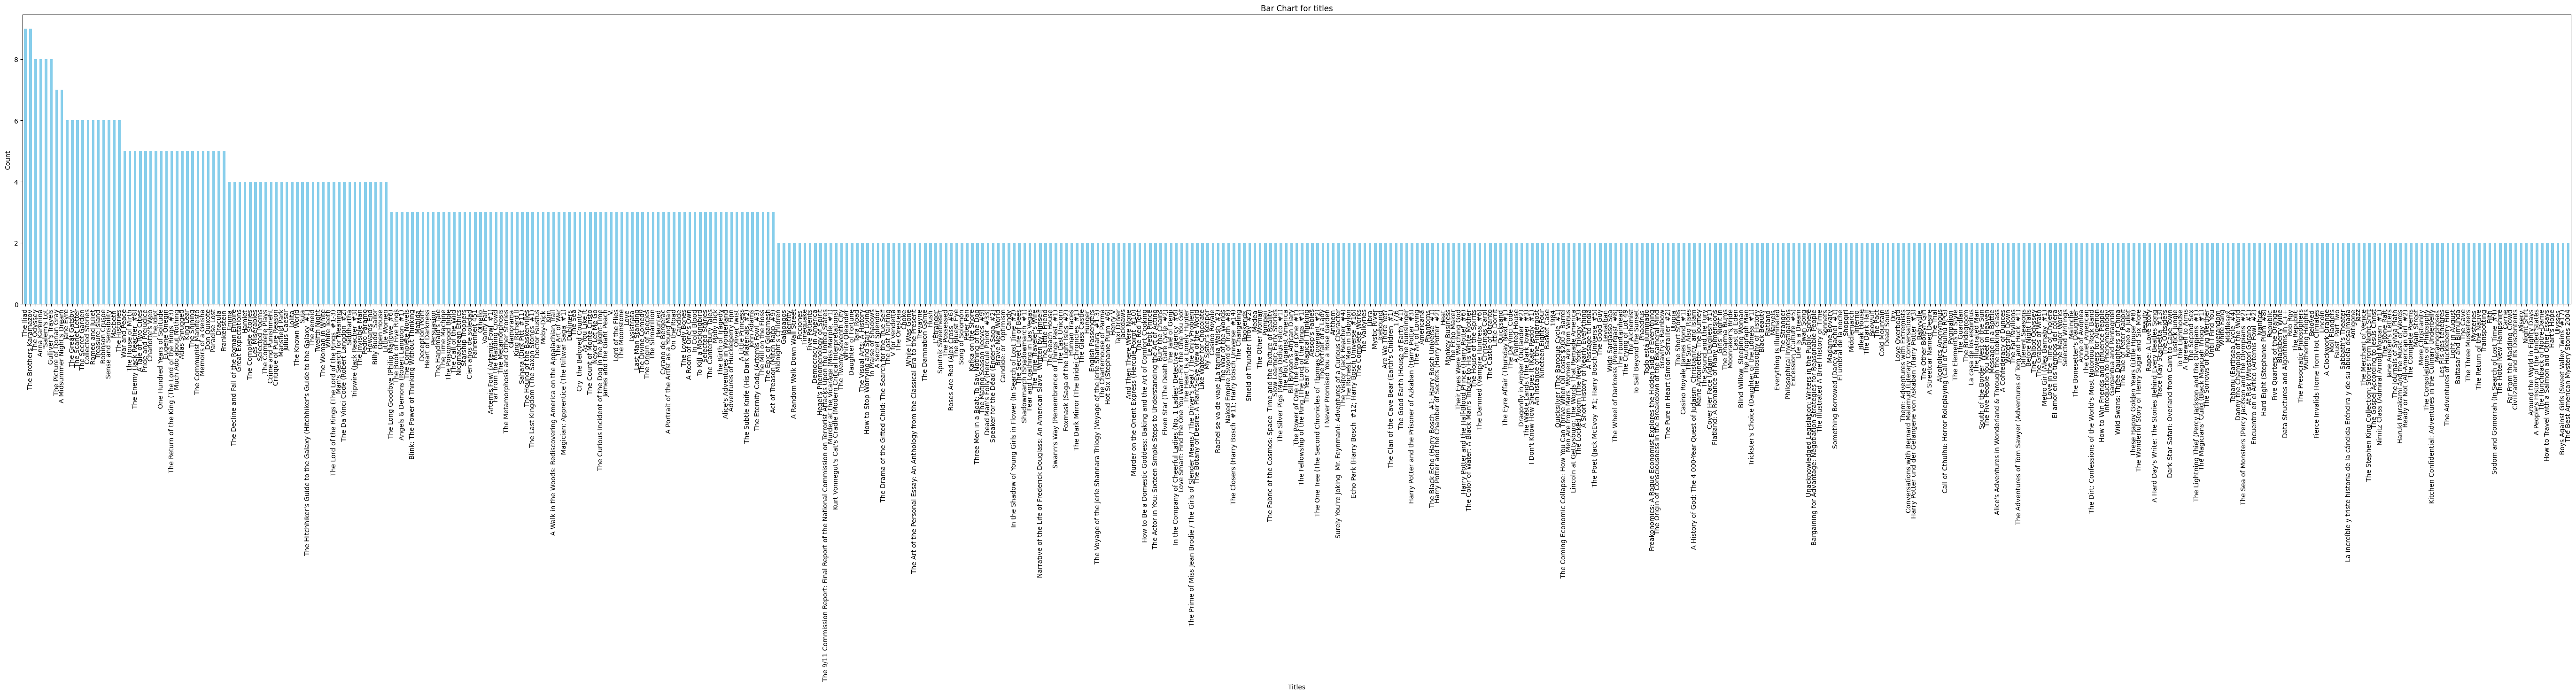

In [ ]:
# Creating a bar chart for duplicate titles

plt.figure(figsize=(70, 8))
duplicate_titles.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title(f'Bar Chart for titles')
plt.xlabel('Titles')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()


---

The `authors` column contains the name of many authors and visualizing it would not demonstrate much information. However, we can find the name of authors that appear more than once in our dataset.

In [ ]:
# Finding authorss that appear more than once in the dataset

author_counts = books['authors'].value_counts()
duplicate_authors = author_counts[author_counts > 1]
duplicate_authors

authors
Stephen King                   40
P.G. Wodehouse                 40
Rumiko Takahashi               39
Orson Scott Card               35
Agatha Christie                33
                               ..
Richard Russo                   2
Philip Pullman/Ian Beck         2
E.L. Konigsburg                 2
Sylvia Engdahl                  2
Philip K. Dick/John Brunner     2
Name: count, Length: 1361, dtype: int64

According to the output above, it shows that 1361 authors appear at least 2 times in our dataset. Visualizing it would not make much sense, so we can look for the authors that appear more than 10 times.

In [ ]:
# Finding authorss that appear more than 10 in the dataset

authors_more_than_10 = author_counts[author_counts > 10]
authors_more_than_10

authors
Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
                    ..
Douglas Coupland    11
William Sleator     11
Clive Barker        11
John McPhee         11
Jack Vance          11
Name: count, Length: 80, dtype: int64

The bar chart below shows the popular authors of our dataset which appear more than 10 time in the dataset.

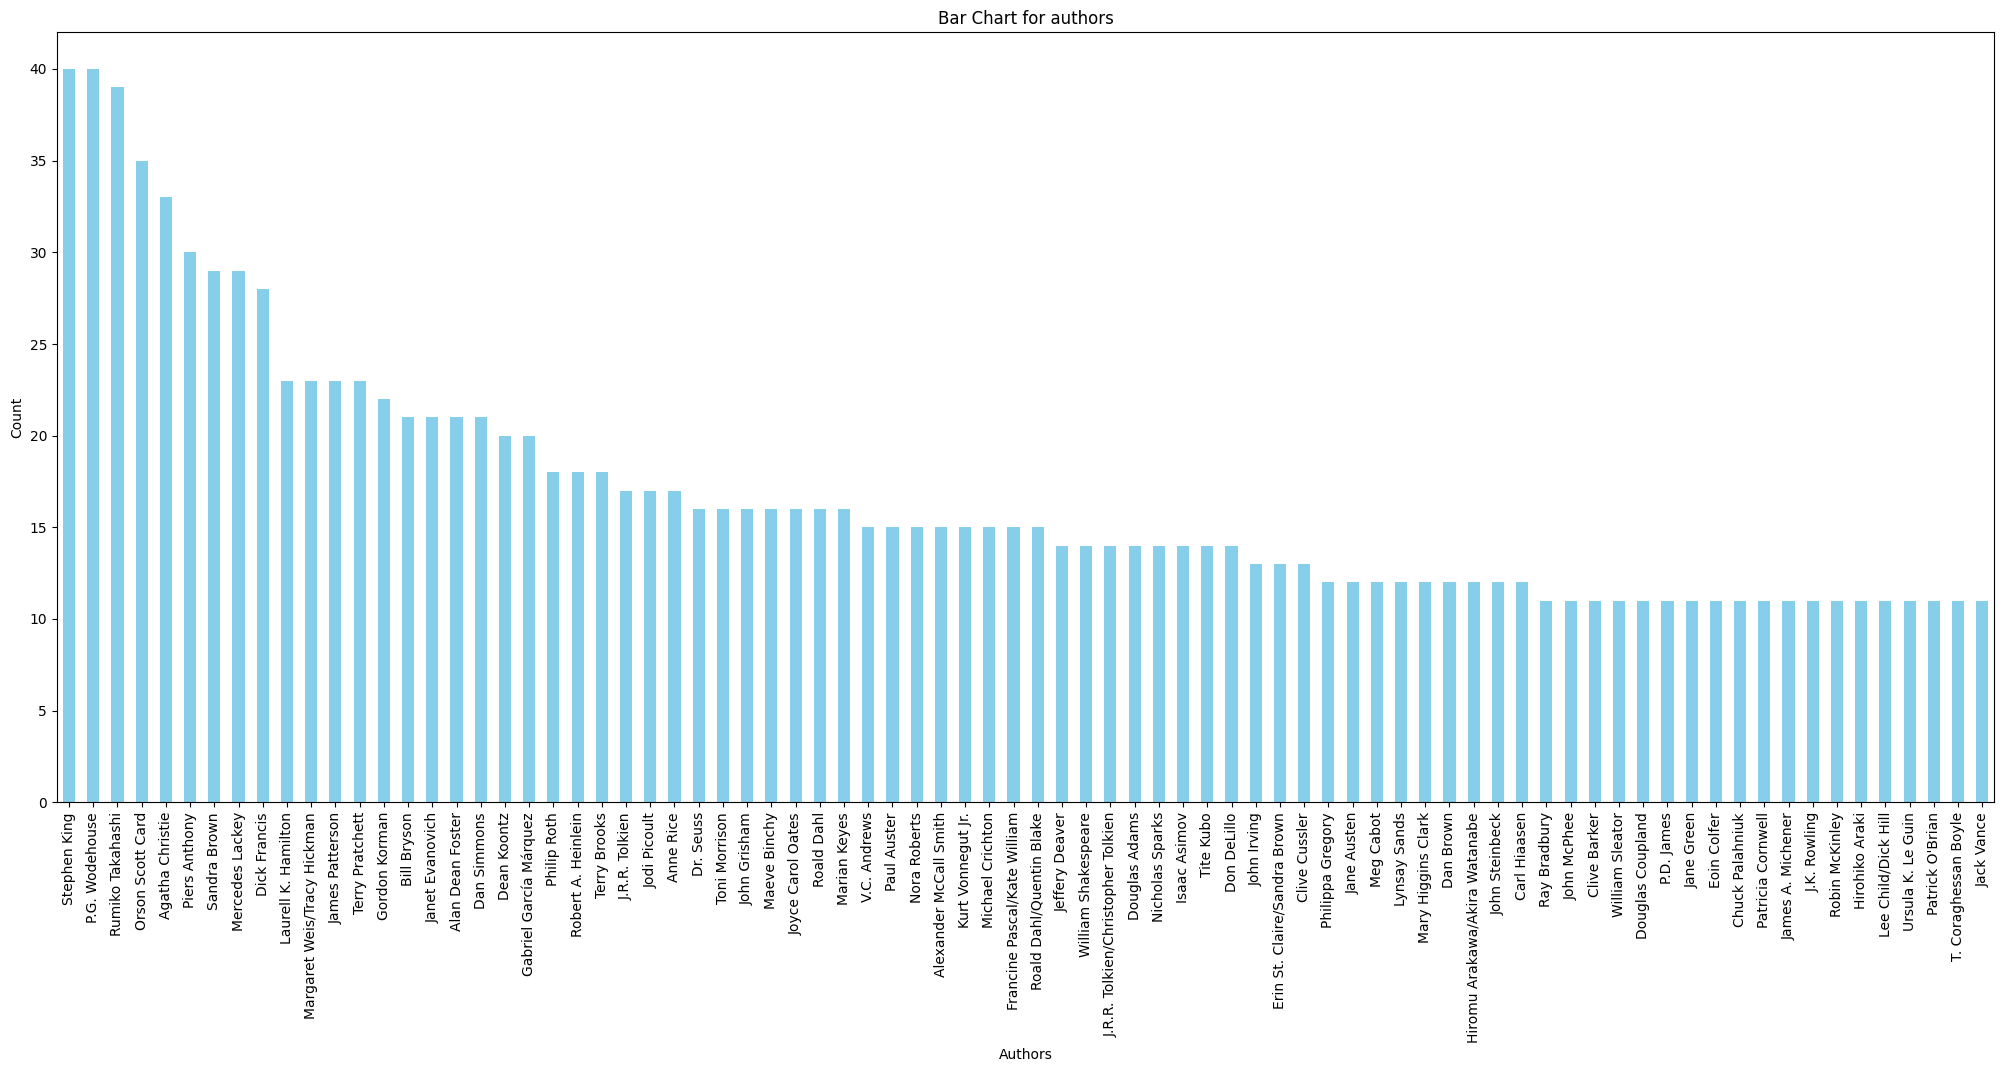

In [ ]:
# Creating a bar chart for authors that appear more than 10 times

plt.figure(figsize=(25, 10))
authors_more_than_10.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title(f'Bar Chart for authors')
plt.xlabel('Authors')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()


---

Visualizing the distribution of different `language_code` variable. It shows that `en` (which may be British English since there is `en_US`, `en_GB`, `en_CA`) is the most popular language in our dataframe, which means most of the books are written in English.

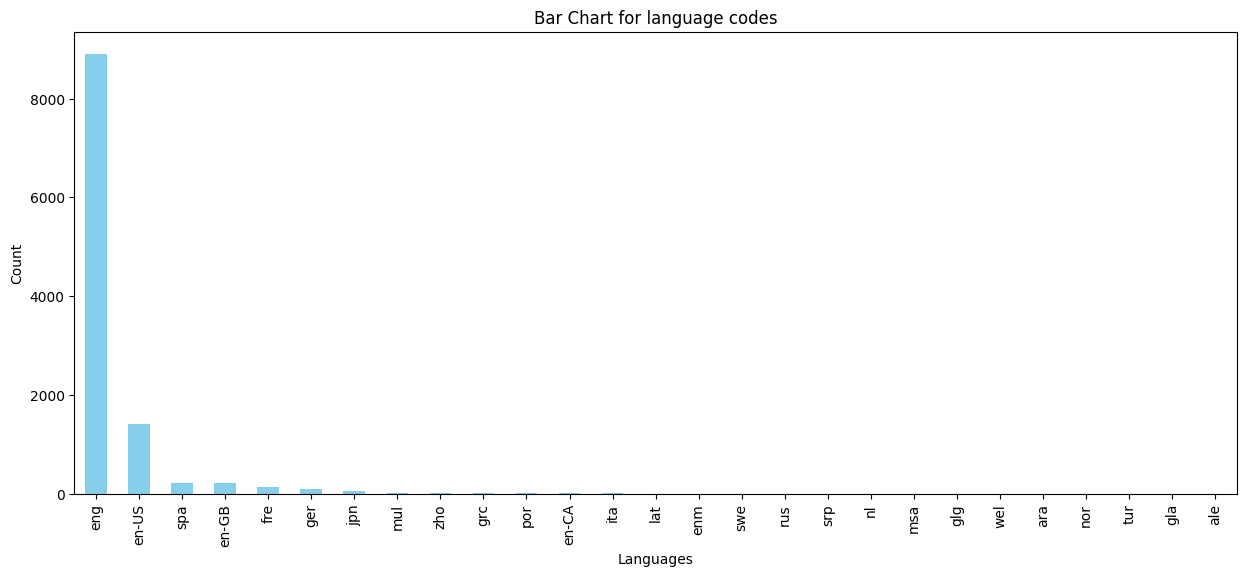

In [ ]:
# Creating a bar chart for language codes

plt.figure(figsize=(15, 6))
books['language_code'].value_counts().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title(f'Bar Chart for language codes')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()


---


The `publication_date` column contains the specific dates that a book is published on. For better insight drawing, we extract the year component of all dates and add it as a new column to our dataset. Then, we can count the values for each `year` and create a bar chart for it.

In [ ]:
# Adding publication_year column to books by extracting the year from publication_date and assigning the type to Int64
books['publication_year'] = pd.to_datetime(books['publication_date'], errors='coerce').dt.year.astype('Int64')

books['publication_year'].head()

0    2006
1    2004
2    2003
3    2004
4    2004
Name: publication_year, dtype: Int64


The chart below shows that most of the books in our dataset were published in 2006.

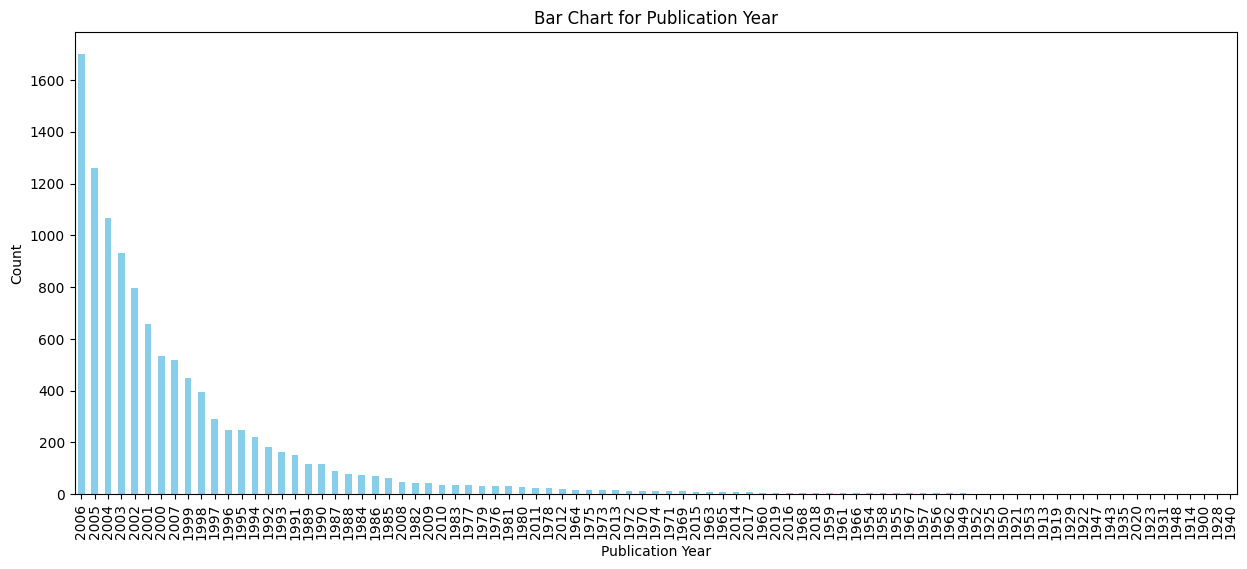

In [ ]:
# Creating a bar chart for publication years

plt.figure(figsize=(15, 6))
books['publication_year'].value_counts().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title(f'Bar Chart for Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()

---

We considered a threshold of 10 for the publishers' popularity. In other words, publishers that appear more than 10 times in our dataframe are taken and a bar chart is drawn to visualize their frequency and distribution.

In [ ]:
# Finding publishers that appear more than 10 times

publisher_counts = books['publisher'].value_counts()
publishers_more_than_10 = publisher_counts[publisher_counts > 10]
publishers_more_than_10

publisher
Vintage                  318
Penguin Books            261
Penguin Classics         184
Mariner Books            150
Ballantine Books         144
                        ... 
Fawcett Books             11
Blackstone Audiobooks     11
Bantam Classics           11
Running Press             11
Kessinger Publishing      11
Name: count, Length: 204, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39208 (\N{CJK UNIFIED IDEOGRAPH-9928}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

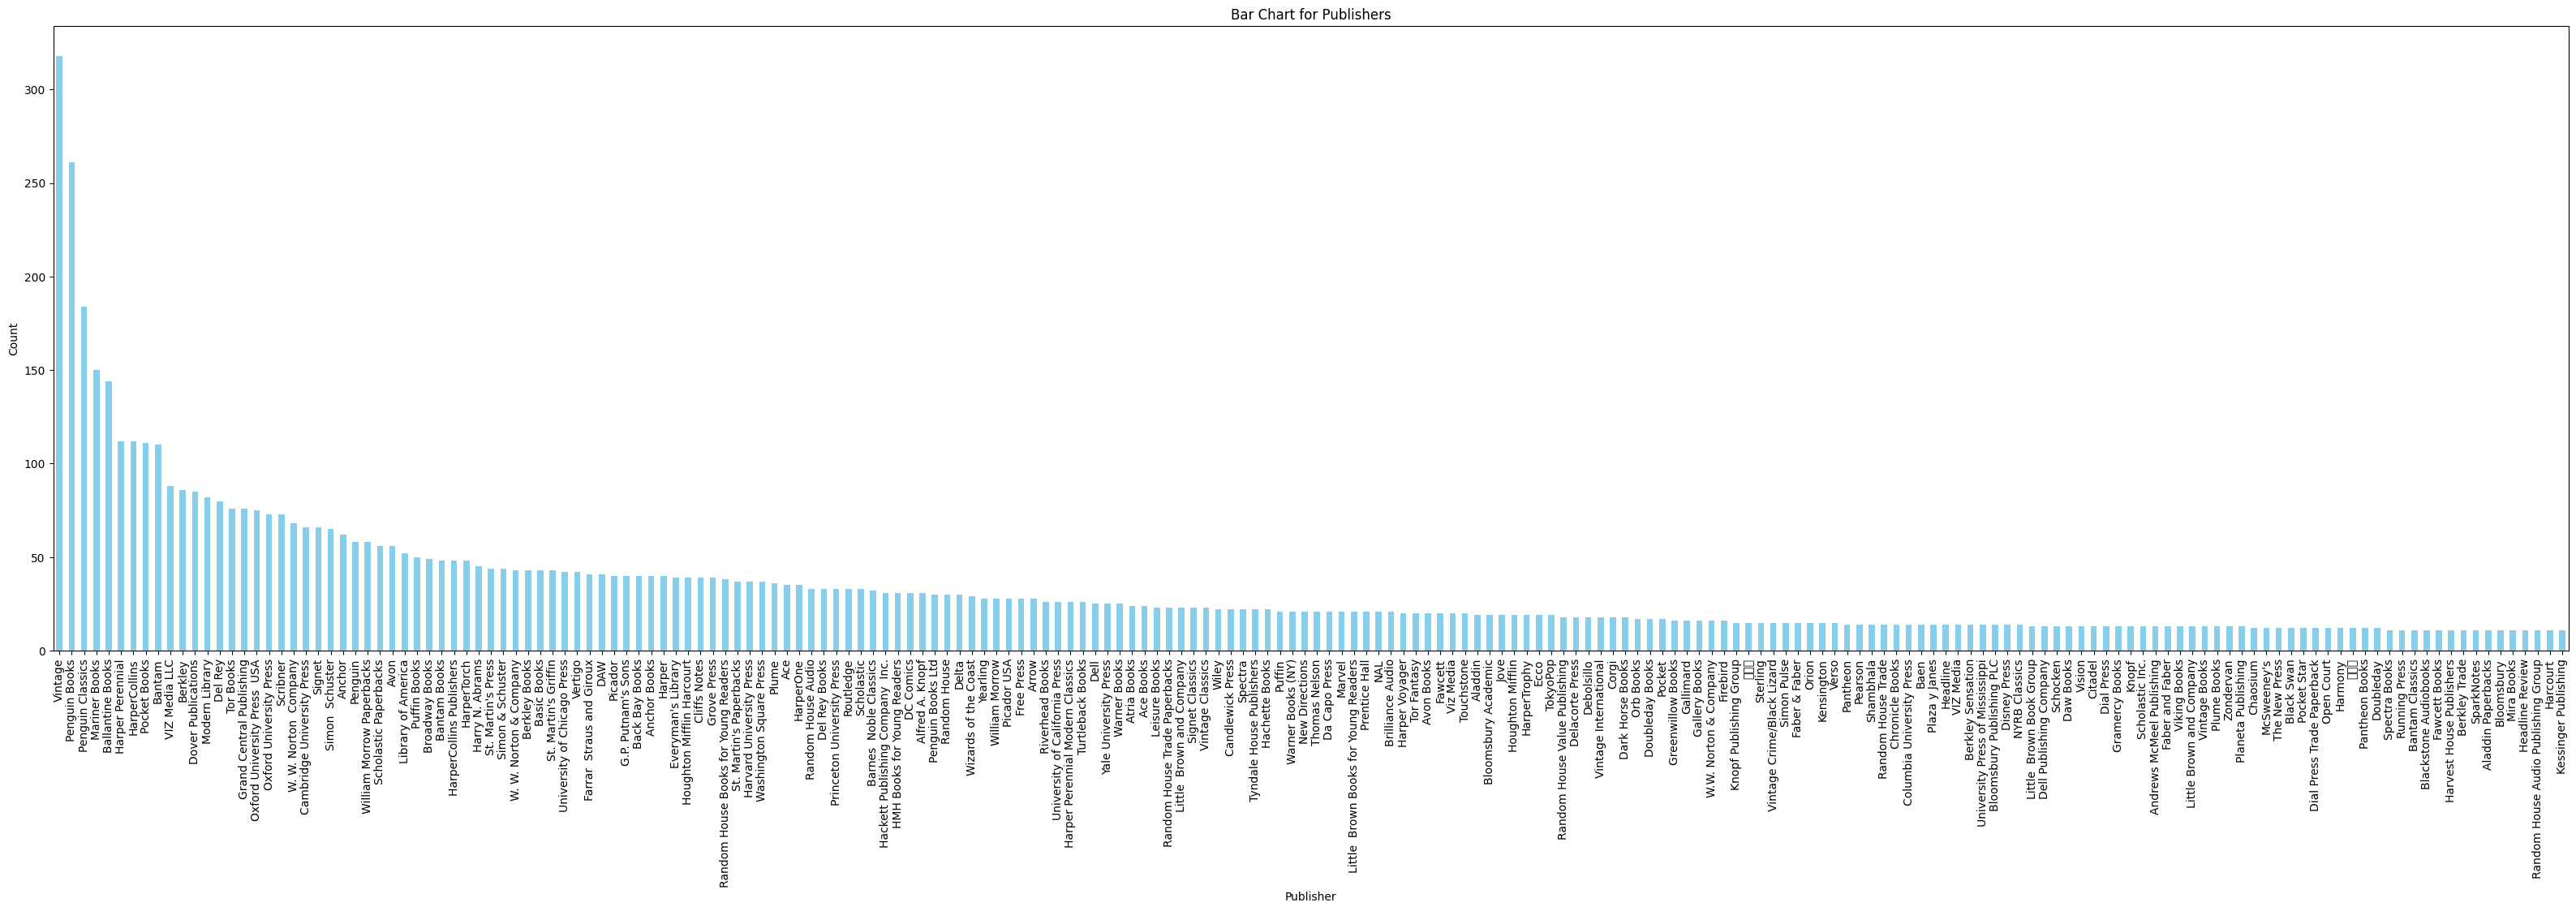

In [ ]:
# Creating a bar chart for publishers

plt.figure(figsize=(40, 10))
publishers_more_than_10.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title(f'Bar Chart for Publishers')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

---

**Note:** We didn't consider `isbn`, `isbn13`, and `bookID` columns in our analysis since they hold unique data for every record in our dataset. Yet, we check for the number of unique values using `nunique()` method of Pandas. There are 11123 rows in our dataset and if number of uniques values in these three columns are equal to that so we can ensure that no values in these columns are duplicated.

In [ ]:
# Printing number of unique values in 'isbn', 'isbn13' and 'bookID' columns

print(books['isbn'].nunique())
print(books['isbn13'].nunique())
print(books['bookID'].nunique())

11123
11123
11123


---

### **Multivariate Analysis**

Multivariate analysis is apply for analyzing more than one variable at a time. To extract trend and insight from our data, we analyze different pairs of columns from our dataframe.

#### **Scatter Plot for Number of Pages vs. Average Rating**

To evaluate the relation between number of pages and average rating we create a scatter plot with correlation coefficient. The plot shows that the values of these two columns are not associated and the correlation coefficient also states a weak dependency between them.

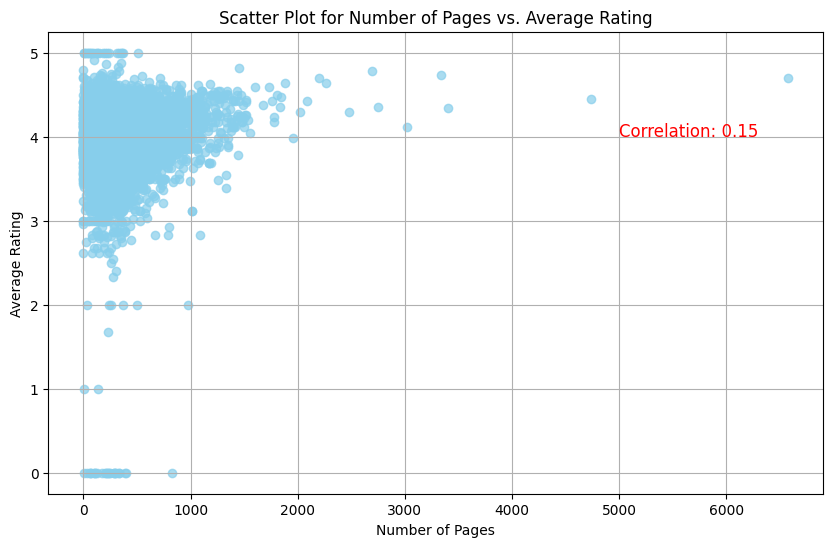

In [ ]:
# Calculating the Correlation Coefficient
correlation_coefficient = books['num_pages'].corr(books['average_rating'])

# Scatter plot for 'num_pages' vs. 'average_rating' with correlation
plt.figure(figsize=(10, 6))
plt.scatter(books['num_pages'], books['average_rating'], color='skyblue', alpha=0.7)
plt.title('Scatter Plot for Number of Pages vs. Average Rating')
plt.xlabel('Number of Pages')
plt.ylabel('Average Rating')
plt.grid(True)

# Adding correlation coefficient as text to the plot
correlation_text = f'Correlation: {correlation_coefficient:.2f}'
plt.text(5000, 4, correlation_text, fontsize=12, color='red')

plt.show()

---

#### **Scatter Plot for Number of Ratings and Average Rating**

To determine the depency between two variables of `ratings_count` and `average_rating` we calculate the correlation coefficient and draw a scatter plot. The plot and the coefficient both shows lack of dependency between the column values.

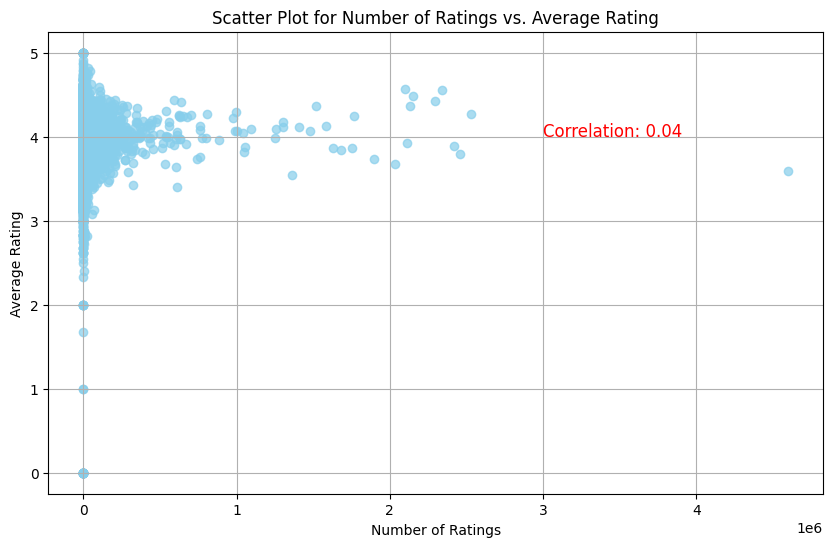

In [ ]:
# Calculating the Correlation Coefficient
correlation_coefficient = books['ratings_count'].corr(books['average_rating'])

# Scatter plot for 'ratings_count' vs. 'average_rating' with correlation
plt.figure(figsize=(10, 6))
plt.scatter(books['ratings_count'], books['average_rating'], color='skyblue', alpha=0.7)
plt.title('Scatter Plot for Number of Ratings vs. Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.grid(True)

# Adding correlation coefficient as text to the plot
correlation_text = f'Correlation: {correlation_coefficient:.2f}'
plt.text(3000000, 4, correlation_text, fontsize=12, color='red')

plt.show()

---

#### **Analyzing Top Publishers by Average Rating**

We want to discover which publishers had published books with higher average ratings according to our dataset.

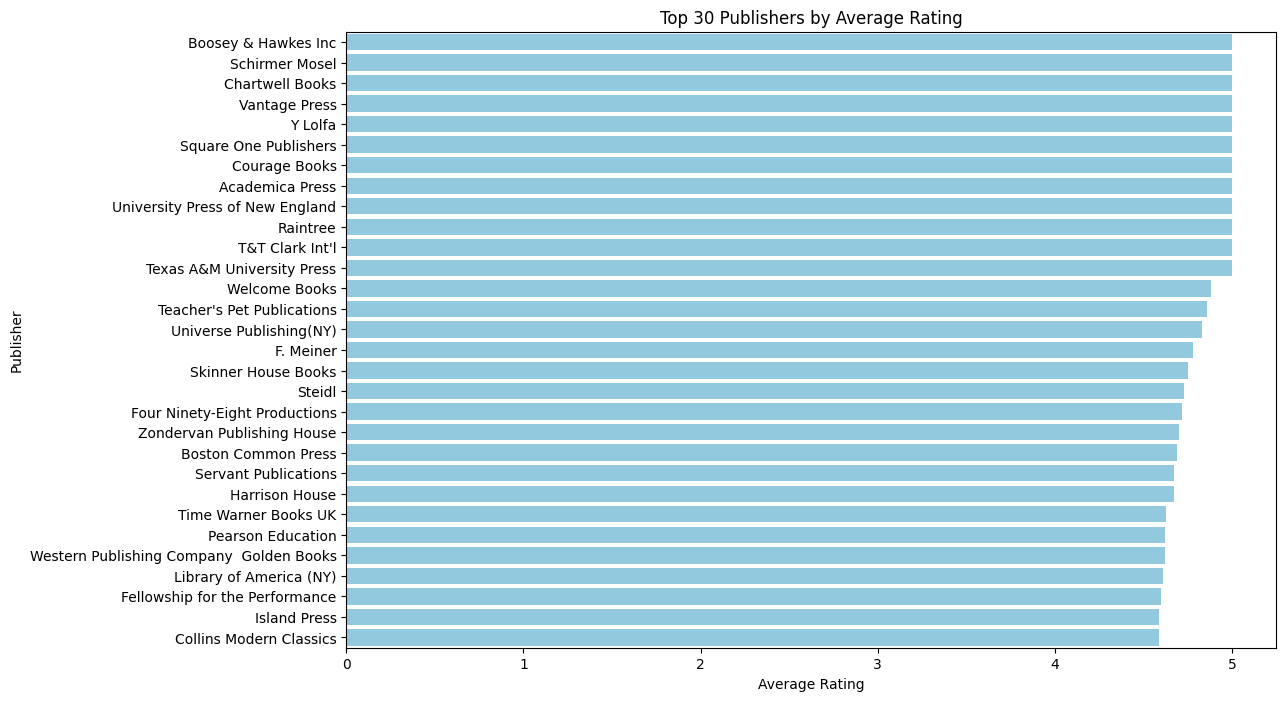

In [ ]:
# Group by publisher and calculate the average rating
publisher_avg_rating = books.groupby('publisher')['average_rating'].mean().reset_index()

# Sort the publishers by average rating for better visualization
publisher_avg_rating = publisher_avg_rating.sort_values(by='average_rating', ascending=False)

# Display the top 30 publishers for better readability in the plot
top_publishers = publisher_avg_rating.head(30)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='average_rating', y='publisher', data=top_publishers, color='skyblue')
plt.title('Top 30 Publishers by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Publisher')
plt.show()

---

#### **Analyzing Top Authors by Average Rating**

Using the code snipet below we will find the best authors who received higher average ratings for their books in our dataset.

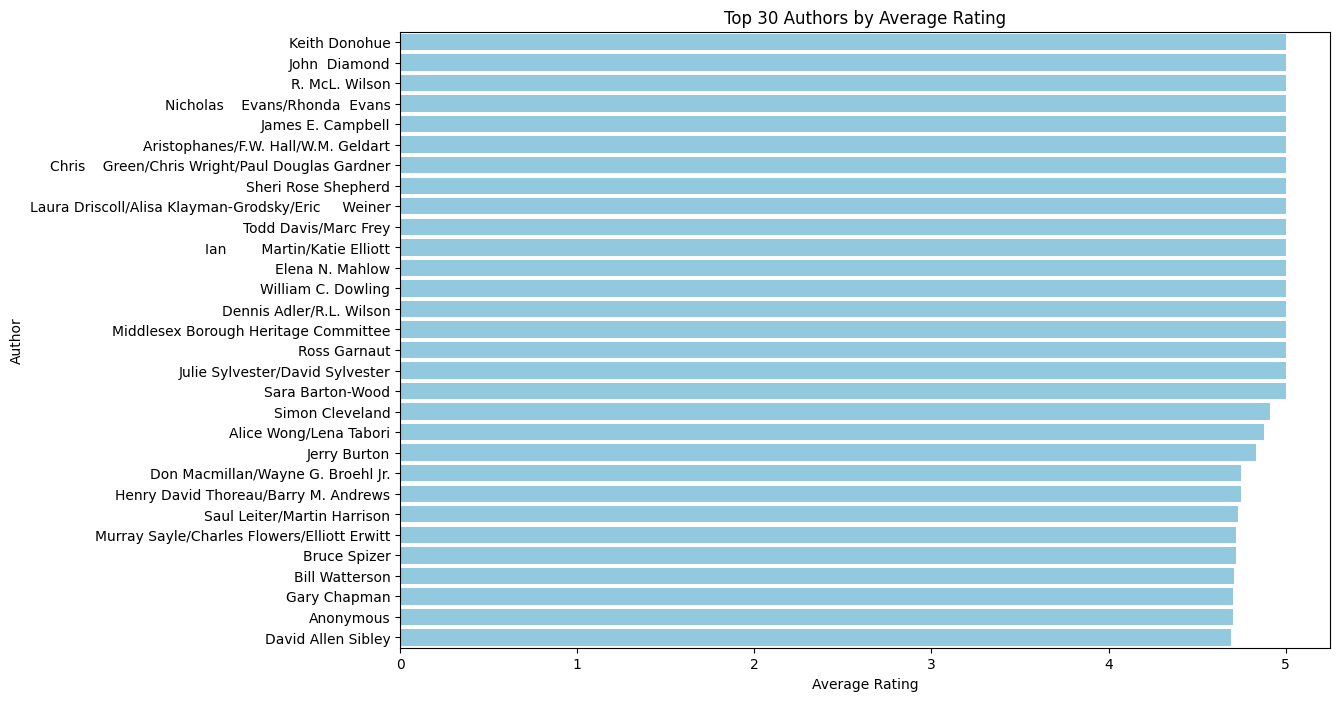

In [ ]:
# Group by author and calculate the average rating
author_avg_rating = books.groupby('authors')[['average_rating', 'num_pages']].mean().reset_index()

# Sort the authors by average rating for better visualization
author_avg_rating = author_avg_rating.sort_values(by='average_rating', ascending=False)

# Display the top 30 authors for better readability in the plot
top_authors = author_avg_rating.head(30)


# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='average_rating', y='authors', data=top_authors, color='skyblue')
plt.title('Top 30 Authors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Author')
plt.show()

---

#### **Analyzing the Number of Pages Our Top Authors Tend to Write**

Now, we want to know how long our top authors like to write their books. For valuating the average number of pages the top authors had written, we create a bar plot to visualize the relationship.

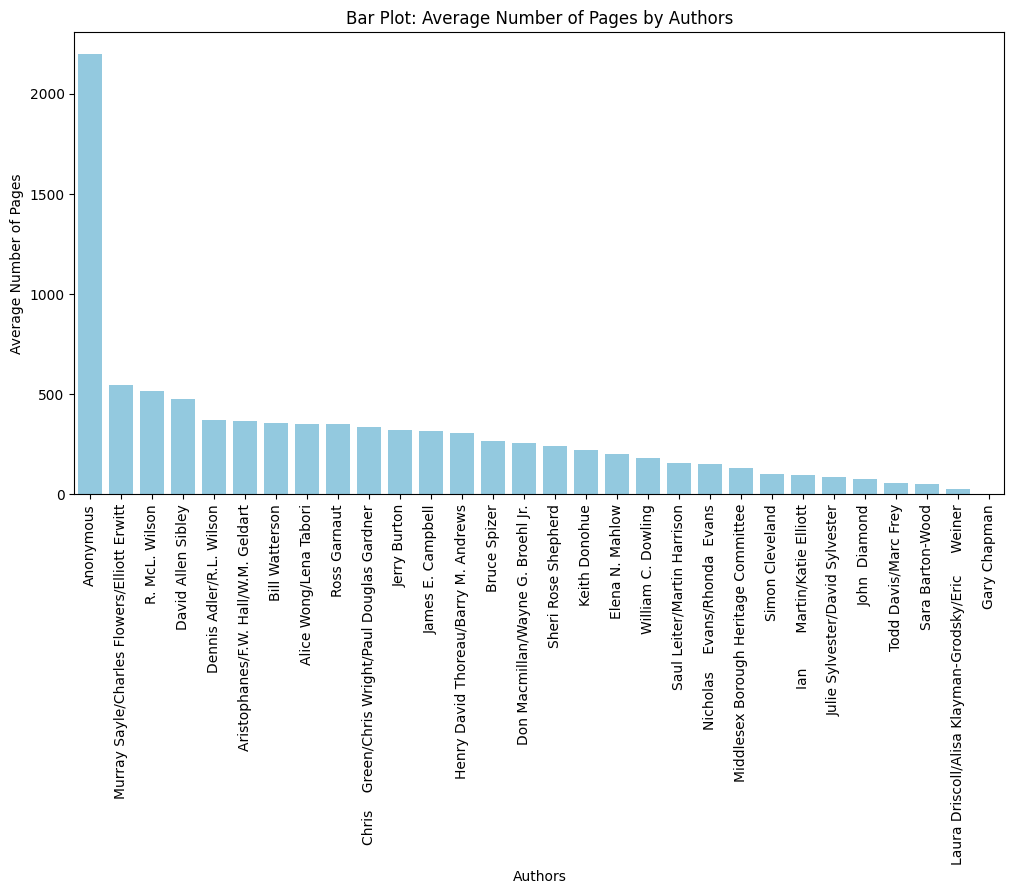

In [ ]:
# Create the bar plot

plt.figure(figsize=(12, 6))
sns.barplot(x='authors', y='num_pages', data=top_authors.sort_values(by='num_pages', ascending=False), color='skyblue')
plt.title('Bar Plot: Average Number of Pages by Authors')
plt.xlabel('Authors')
plt.ylabel('Average Number of Pages')
plt.xticks(rotation=90)
plt.show()

---

#### **Analyzing the Relationship Between Publication Year and Average Rating**

# *You have 6 numrical columns in dataset*

To know whether the recent books have higher average rating or not, we create a correlation matrix for `publication_year` and `average_rating` columns.

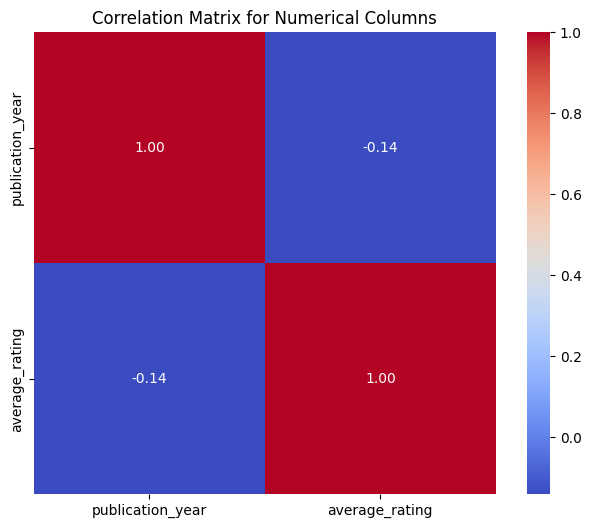

In [ ]:
# Grouping books by year and calculating the average of ratings for each year
avg_rating_by_year = books.groupby('publication_year')['average_rating'].mean().reset_index()

# Computing correlation matrix on the new dataframe
correlation_matrix = avg_rating_by_year[['publication_year', 'average_rating']].corr()

# Ploting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()



Visualizing the relationship using a scatter plot. The following plot states that no obvious trend between `publication_year` and `average_rating`. So the assumption that "books published in recent years have higher average rating" does not imply.

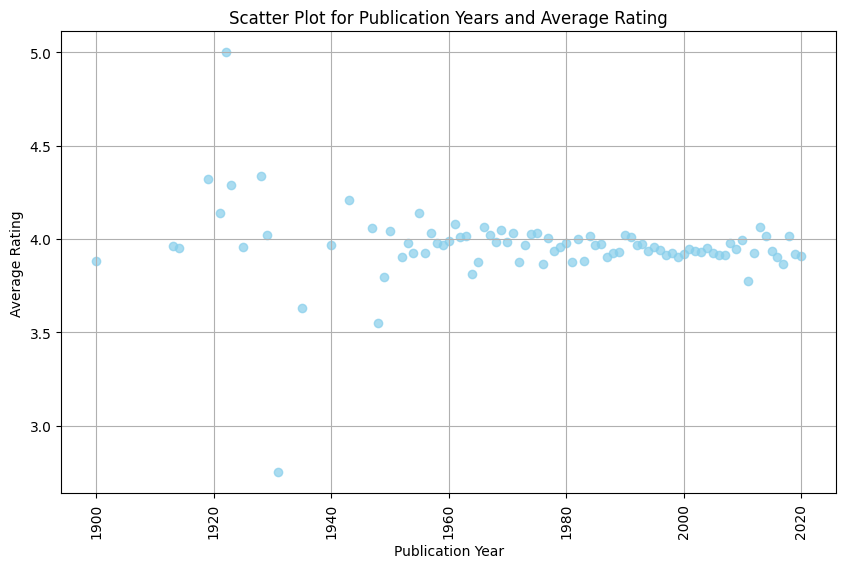

In [ ]:
# Creating a scatter plot for demonstrating the relationship between publication year and average rating

plt.figure(figsize=(10, 6))
plt.scatter(x='publication_year', y='average_rating', data=avg_rating_by_year, color='skyblue', alpha=0.7)
plt.title('Scatter Plot for Publication Years and Average Rating')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(True)

## **4. Data Preprocessing**

### Checking for Null Values

Based on the following codes' output, we have no null values in our columns.

In [ ]:
# Count of null values in each column
null_counts = books.isnull().sum()
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
publication_year      2
dtype: int64


### Checking for Duplicate Rows

Based on the following codes' output, there are no duplicate rows in our dataframe.

In [ ]:
# Checking for duplicate values
duplicate_rows = books.duplicated().sum()

# Printing the count of duplicate rows
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


### Checking Uniqueness of Values for Columns That Should Hold Unique Data

In our dataset, there are 3 columns that should hold unique values for each record and they are `isbn`, `isbn13` and `bookID`. We first check for the dataset's dimension and then compare the number of unique values for each column with the number of rows.

In [ ]:
# Checking the dataset's dimensions
rows, cols = books.shape

# Cheking the number of unique values for each column
isbn_nunique = books['isbn'].nunique()
isbn13_nunique = books['isbn13'].nunique()
bookID_nunique = books['bookID'].nunique()

print('The books dataframe has {} rows.'.format(rows))
print('The isbn column has {} unique values.'.format(isbn_nunique))
print('The isbn13 column has {} unique values.'.format(isbn13_nunique))
print('The bookID column has {} unique values.'.format(bookID_nunique))



The books dataframe has 11123 rows.
The isbn column has 11123 unique values.
The isbn13 column has 11123 unique values.
The bookID column has 11123 unique values.


### Trimming Spaces from Nomainal Columns' Values

For 3 nominal columns of our dataframe, we trim spaces for each value for any possible inconsistencies in our data.

In [ ]:
# Creating a list of nominal columns
nominal_cols = ['title', 'authors', 'publisher']

# Loopin through the nominal columns' list to strip the values
for col in nominal_cols:
  books[col] = books[col].str.strip()


0        Harry Potter and the Half-Blood Prince (Harry ...
1        Harry Potter and the Order of the Phoenix (Har...
2        Harry Potter and the Chamber of Secrets (Harry...
3        Harry Potter and the Prisoner of Azkaban (Harr...
4        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
                               ...                        
11118     Expelled from Eden: A William T. Vollmann Reader
11119                          You Bright and Risen Angels
11120                      The Ice-Shirt (Seven Dreams #1)
11121                                          Poor People
11122                          Las aventuras de Tom Sawyer
Name: title, Length: 11123, dtype: object

### Inspecting Rows With Duplicated Book Titles

We check the rows with duplicated titles to inspect the columns. The result states that these books are in different languages, published in different years or by distinct publisher, have different average_rating and ratings_count.

In [ ]:
# Inspecting rows with duplicated book titles
titles_duplicated = books[books.duplicated('title', keep=False)]
titles_duplicated

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown,2004
10,16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,0739322206,9780739322208,eng,6,1266,253,3/23/2005,Random House Audio,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11075,45463,Encuentro en el Ártico (Artemis Fowl #2),Eoin Colfer/Ana Alcaina Pérez,3.95,0307343103,9780307343109,spa,320,15,3,7/5/2005,Montena,2005
11076,45465,Artemis Fowl (Artemis Fowl #1),Eoin Colfer/Nathaniel Parker,3.84,1400085918,9781400085910,eng,6,55,14,4/6/2004,Listening Library,2004
11078,45479,The Subtle Knife (His Dark Materials #2),Philip Pullman/Ian Beck,4.13,0375846727,9780375846724,eng,326,677,77,9/1/2007,Alfred A. Knopf Books for Young Readers,2007
11080,45485,The Subtle Knife (His Dark Materials #2),Philip Pullman,4.13,0807210471,9780807210475,eng,8,39,8,1/28/2000,Listening Library,2000
